Synthetic Data (First 5 rows):
   Feature_1  Feature_2  Cluster
0  -9.435497   6.218725        3
1  -9.956865   6.823601        3
2  -1.439889   7.427189        0
3  -7.162613  -5.451700        2
4 -11.487890   6.013011        3


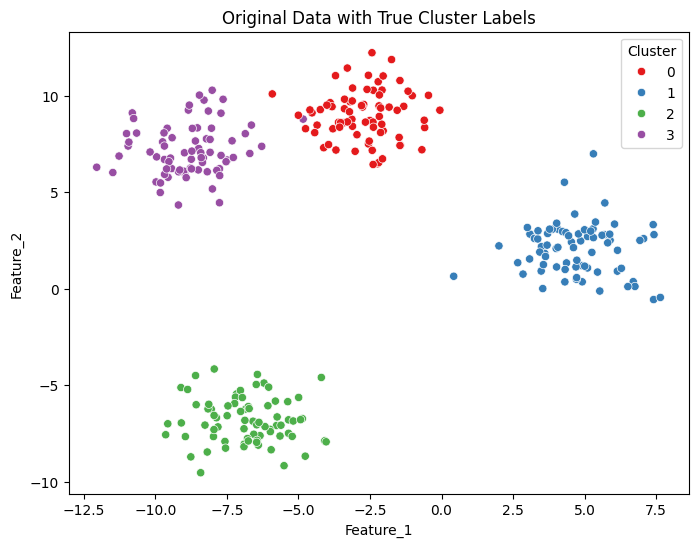

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data using make_blobs
n_samples = 300
centers = 4
random_state = 42

X, y = make_blobs(n_samples=n_samples, centers=centers, random_state=random_state, cluster_std=1.3)

# Convert to a Pandas DataFrame
data = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
data['Cluster'] = y

print("Synthetic Data (First 5 rows):")
print(data.head())

# Visualize the original clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Cluster', data=data, palette='Set1')
plt.title('Original Data with True Cluster Labels')
plt.show()


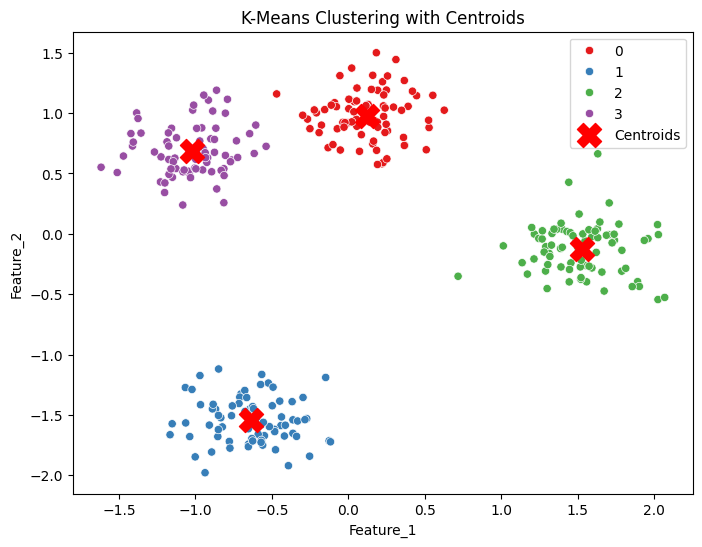

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data using make_blobs
n_samples = 300
centers = 4
random_state = 42

X, y = make_blobs(n_samples=n_samples, centers=centers, random_state=random_state, cluster_std=1.3)

# Convert to a Pandas DataFrame
data = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

# Step 2: Normalize the data
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=['Feature_1', 'Feature_2'])

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=random_state)
kmeans_labels = kmeans.fit_predict(data_normalized)

# Step 4: Get centroids of the clusters
centroids = kmeans.cluster_centers_

# Step 5: Plot the clusters with centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', hue=kmeans_labels, palette='Set1', data=data_normalized, legend='full')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

# Add title and legend
plt.title('K-Means Clustering with Centroids')
plt.legend()
plt.show()


To calculate how a new point is assigned to a cluster when using K-Means, follow these steps. Each step explains how the algorithm assigns a new point to the nearest cluster based on the centroids.

### Steps to Calculate When a New Point Appears

#### 1. **Obtain the Centroids**
After applying the K-Means algorithm, the centroids (cluster centers) are already calculated. For example, in the previous K-Means implementation, the centroids are stored in `kmeans.cluster_centers_`.

#### 2. **New Point Normalization**
If the new point is part of the original feature space (before normalization), you should normalize it using the same normalization technique applied to the training data.

Example of a new point:

```python
new_point = np.array([[1.5, 3.2]])  # Original space coordinates
```

Apply normalization (same scaling applied to the original data):

```python
new_point_normalized = scaler.transform(new_point)  # Use the same scaler from before
```

#### 3. **Calculate Euclidean Distance to Each Centroid**
Once you have the new point normalized, calculate the distance from the new point to each centroid using the Euclidean distance formula:

\[
\text{distance} = \sqrt{\sum (x_{new} - x_{centroid})^2}
\]

In Python, this can be done using NumPy:

```python
from numpy.linalg import norm

# Calculate the distance from the new point to each centroid
distances = [norm(new_point_normalized - centroid) for centroid in centroids]

# Show the distances
for i, d in enumerate(distances):
    print(f"Distance from new point to centroid {i}: {d:.4f}")
```

#### 4. **Assign the New Point to the Nearest Cluster**
Find the index of the centroid that has the smallest distance to the new point:

```python
# Find the nearest centroid (cluster)
nearest_cluster = np.argmin(distances)
print(f"New point belongs to cluster {nearest_cluster}")
```

### Step-by-Step Example with a New Point

Let’s walk through an example using a new point `[1.5, 3.2]`:

```python
# Step 1: Generate the new point in original space
new_point = np.array([[1.5, 3.2]])

# Step 2: Normalize the new point using the same scaler
new_point_normalized = scaler.transform(new_point)

# Step 3: Calculate Euclidean distance to each centroid
distances = [norm(new_point_normalized - centroid) for centroid in centroids]

# Display distances
for i, d in enumerate(distances):
    print(f"Distance from new point to centroid {i}: {d:.4f}")

# Step 4: Assign the new point to the nearest cluster
nearest_cluster = np.argmin(distances)
print(f"New point belongs to cluster {nearest_cluster}")
```

### Visualizing the New Point and Clusters

You can also visualize where the new point belongs on the plot:

```python
# Plot the original clusters with centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', hue=kmeans_labels, palette='Set2', data=data_normalized, legend='full')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

# Plot the new point
plt.scatter(new_point_normalized[0, 0], new_point_normalized[0, 1], s=200, c='blue', marker='o', label='New Point')

# Add title and legend
plt.title('K-Means Clustering with New Point')
plt.legend()
plt.show()
```

### Summary of Steps:
1. **Normalize the new point** using the same transformation applied to the original data.
2. **Calculate the distance** between the new point and each centroid using the Euclidean distance.
3. **Assign the point** to the nearest cluster (smallest distance).
4. **Visualize** the new point on the cluster plot for better understanding.

These steps show how K-Means assigns a new point to a cluster based on its proximity to the centroids.

In [17]:
# Step 1: Generate the new point in original space
new_point = np.array([[1.5, 3.2]])

# Step 2: Normalize the new point using the same scaler
new_point_normalized = scaler.transform(new_point)

# Step 3: Calculate Euclidean distance to each centroid
distances = [norm(new_point_normalized - centroid) for centroid in centroids]

# Display distances
for i, d in enumerate(distances):
    print(f"Distance from new point to centroid {i}: {d:.4f}")

# Step 4: Assign the new point to the nearest cluster
nearest_cluster = np.argmin(distances)
print(f"New point belongs to cluster {nearest_cluster}")

Distance from new point to centroid 0: 1.2169
Distance from new point to centroid 1: 2.2332
Distance from new point to centroid 2: 0.6330
Distance from new point to centroid 3: 2.0414
New point belongs to cluster 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


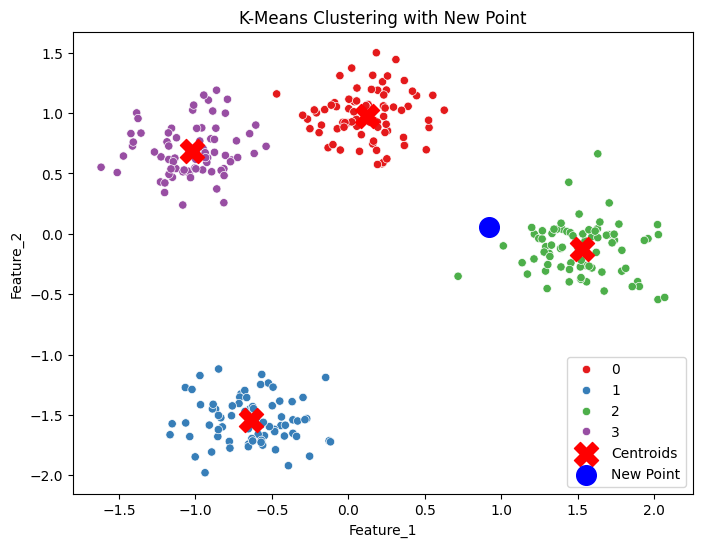

In [19]:
# Plot the original clusters with centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', hue=kmeans_labels, palette='Set1', data=data_normalized, legend='full')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

# Plot the new point
plt.scatter(new_point_normalized[0, 0], new_point_normalized[0, 1], s=200, c='blue', marker='o', label='New Point')

# Add title and legend
plt.title('K-Means Clustering with New Point')
plt.legend()
plt.show()

Hierarchical clustering is a different approach from K-Means.

It creates a hierarchy of clusters either in a **bottom-up** (agglomerative) or **top-down** (divisive) fashion.

Here's a step-by-step guide on how to assign a new point to a cluster using **agglomerative hierarchical clustering**.

### Steps for Hierarchical Clustering with a New Point

Hierarchical clustering does not naturally support dynamic assignment of new points after clustering, but there is a way to achieve this by calculating distances between the new point and all the existing clusters (often using linkage metrics like single, complete, or average linkage). Here's how:

### Step 1: Perform Hierarchical Clustering

Before dealing with the new point, we first need to apply hierarchical clustering on the initial dataset. Let’s assume we are using **Agglomerative Clustering**.



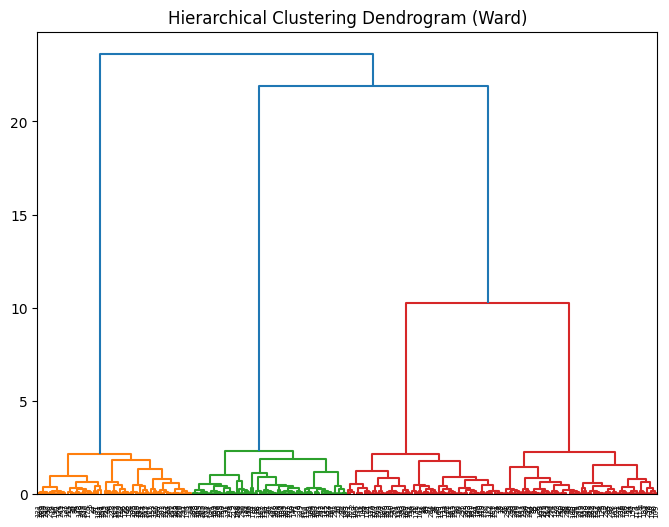

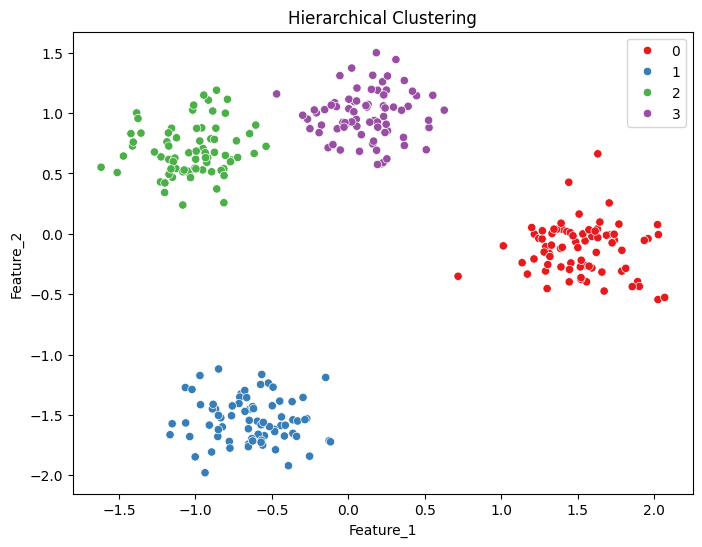

In [24]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_cluster.fit_predict(data_normalized)

# Visualize Dendrogram (optional for understanding)
Z = linkage(data_normalized, 'ward')
plt.figure(figsize=(8, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.show()

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', hue=agg_labels, palette='Set1', data=data_normalized)
plt.title('Hierarchical Clustering')
plt.show()



### Step 2: Normalize the New Point

To be consistent with the clustering process, we need to normalize the new point using the same scaler applied to the original data.


In [21]:
new_point = np.array([[1.5, 3.2]])  # Example of a new point in the original feature space
new_point_normalized = scaler.transform(new_point)  # Normalize the new point
new_point_normalized

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.91757503, 0.05732999]])



### Step 3: Calculate Distance to Each Cluster

Hierarchical clustering often uses **linkage** to define cluster distances. The most common methods are:

- **Single Linkage**: Minimum distance between points in different clusters.
- **Complete Linkage**: Maximum distance between points in different clusters.
- **Average Linkage**: Average distance between points in different clusters.

We need to calculate the distance from the new point to each cluster, then assign the point to the closest cluster based on the chosen linkage method.

To illustrate, we can use **average linkage** (average distance between the new point and all points in the cluster):



In [22]:
from scipy.spatial.distance import cdist

def calculate_average_linkage(cluster_data, new_point):
    # Compute the average distance between the new point and all points in the cluster
    return np.mean(cdist(cluster_data, new_point))

# Step 1: Group the data by their cluster labels
clusters = [data_normalized[agg_labels == label] for label in np.unique(agg_labels)]

# Step 2: Calculate the average linkage distance to each cluster
distances_to_clusters = [calculate_average_linkage(cluster, new_point_normalized) for cluster in clusters]

# Step 3: Find the cluster with the smallest average linkage distance
nearest_cluster = np.argmin(distances_to_clusters)
print(f"New point belongs to cluster {nearest_cluster}")

New point belongs to cluster 0




### Step 4: Assign the New Point to the Closest Cluster

The cluster with the smallest distance will be the one to which the new point is assigned. Here’s the logic:

1. **Calculate distances** from the new point to each cluster using a linkage method.
2. **Assign the new point** to the cluster with the smallest distance.

### Visualizing the New Point with Hierarchical Clustering

Once the new point is assigned, you can visualize where it belongs:



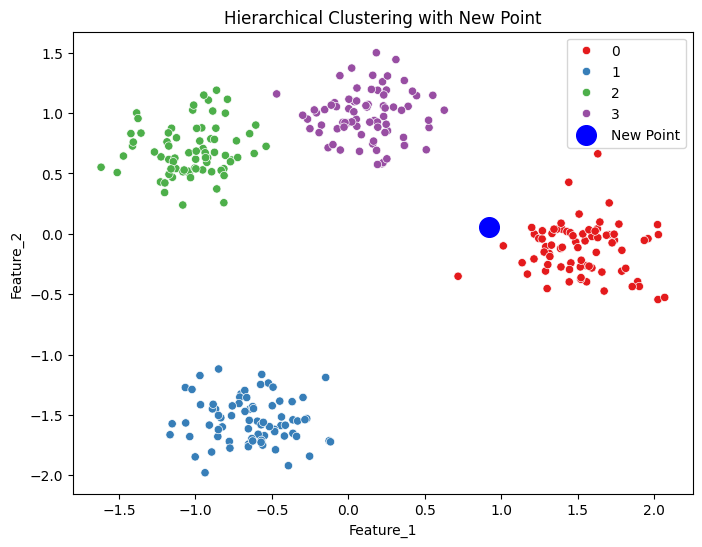

In [25]:

# Visualize clusters and new point
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', hue=agg_labels, palette='Set1', data=data_normalized)

# Plot the new point
plt.scatter(new_point_normalized[0, 0], new_point_normalized[0, 1], s=200, c='blue', marker='o', label='New Point')

# Add title and legend
plt.title('Hierarchical Clustering with New Point')
plt.legend()
plt.show()



### Steps to Perform Clustering Using **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

DBSCAN forms clusters based on the density of data points and leaves outliers unclustered. It’s a useful algorithm when you expect irregularly shaped clusters and want to handle noise or outliers naturally.

### Step 1: Data Preparation

As with other clustering methods, the data needs to be preprocessed (e.g., normalized) to ensure all features contribute equally.



In [26]:

from sklearn.preprocessing import StandardScaler

# Normalize the data (Example data assumed to be 'data')
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)




### Step 2: Import DBSCAN from `sklearn.cluster`



In [29]:

from sklearn.cluster import DBSCAN




### Step 3: Initialize and Configure DBSCAN

DBSCAN has two important parameters:
- `eps`: The maximum distance between two points for them to be considered neighbors.
- `min_samples`: The minimum number of points required to form a dense region (cluster).

Initialize DBSCAN with these parameters.


In [30]:
dbscan = DBSCAN(eps=0.3, min_samples=5)

### Step 4: Fit the Model and Predict Cluster Labels

Apply the DBSCAN model to the normalized dataset and generate cluster labels.


In [31]:
dbscan_labels = dbscan.fit_predict(data_normalized)


- Points with label `-1` are considered outliers (not part of any cluster).
- Other labels (e.g., `0`, `1`, `2`) represent different clusters.


### Step 5: Visualize the Clusters and Outliers

Visualize the clusters and identify outliers in the plot.


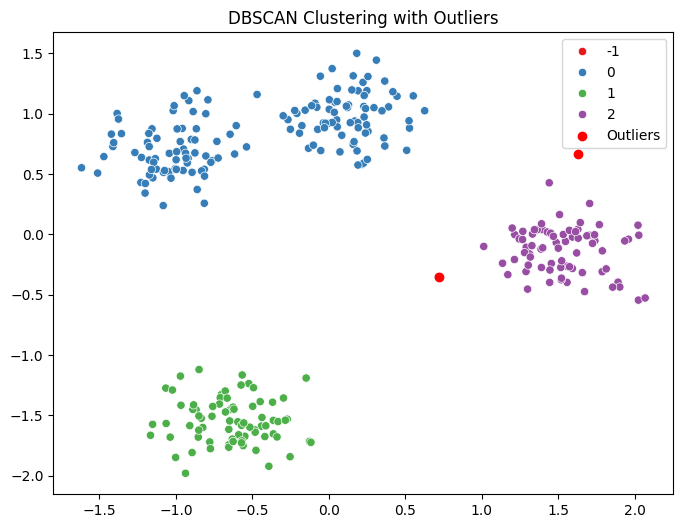

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot DBSCAN results, with a special color for outliers (label = -1)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_normalized[:, 0], y=data_normalized[:, 1], hue=dbscan_labels, palette='Set1')

# Highlight outliers (label -1) in a separate color
outliers = (dbscan_labels == -1)
plt.scatter(data_normalized[outliers, 0], data_normalized[outliers, 1], color='red', label='Outliers')

plt.title('DBSCAN Clustering with Outliers')
plt.legend()
plt.show()


### Step 6: Evaluate Results

Unlike K-Means or Hierarchical Clustering, DBSCAN does not require specifying the number of clusters. Instead, it detects clusters based on density. Key points:
- **Outliers**: Points that do not fit into any dense cluster (labeled `-1`).
- **Clusters**: Groups of points closely packed together (labeled as `0`, `1`, etc.).


### Summary:
- **Prepare** and **normalize** the data.
- **Import and initialize** DBSCAN, specifying `eps` (neighborhood size) and `min_samples` (minimum points for a dense region).
- **Fit the model** and **predict cluster labels**.
- **Visualize the clusters and outliers** to evaluate the result.
- DBSCAN handles noise and outliers naturally by assigning them a label of `-1`.

DBSCAN is particularly useful for identifying noise and clusters that are not well-separated by shape or distance, making it more flexible than other clustering algorithms like K-Means.

### **Assignment: Customer Segmentation Using Clustering Techniques**

#### **Objective**:
The goal of this assignment is to perform customer segmentation based on simulated customer purchase and activity data. You will explore one of the clustering algorithms (K-Means, DBSCAN, or Hierarchical Clustering) to group customers into meaningful segments and analyze their behaviors.

---

### **Task**:

1. **Data Generation**:
   Simulate customer data for **500 customers** with the following features:
   - **Customer_Age**: Age of the customer.
   - **Annual_Income (k$)**: Customer's annual income (in thousands of dollars).
   - **Spending_Score (1-100)**: A score assigned to the customer based on their spending behavior.
   - **Website_Activity_Score (1-100)**: A score based on how actively the customer interacts with the website.

   You may generate random values for these features using `NumPy` or `Pandas` functions to create variability. Additionally, you can introduce noise or missing values to make the data more challenging.

2. **Data Preprocessing**:
   - **Handle Missing Values**: Simulate some missing values in the dataset (e.g., missing income or spending scores for 5-10% of the customers). Use imputation methods to fill in the missing data.
   - **Normalization**: Normalize the data to ensure all features contribute equally to the clustering algorithm.

3. **Clustering**:
   Choose one of the following clustering algorithms:
   - **K-Means Clustering**
   - **DBSCAN (Density-Based Spatial Clustering)**
   - **Hierarchical Clustering (Agglomerative)**

   Apply the chosen algorithm to segment the customers based on the available features. You may need to set parameters like `k` in K-Means or Hierarchical, or `eps` and `min_samples` for DBSCAN. Experiment with different values to get meaningful clusters.

4. **Evaluation**:
   - Visualize the resulting clusters using a scatter plot. Use different colors to represent different clusters.
   - Calculate the **silhouette score** to evaluate the quality of the clusters.
   - Identify and discuss any **outliers** (for DBSCAN) or noisy points that don't belong to any cluster.

5. **Insights & Reporting**:
   - Provide a brief report summarizing the segmentation results.
   - Explain what customer groups were identified and how these insights could help a business make decisions (e.g., product recommendations, personalized marketing).
   - Discuss any limitations or challenges faced during the clustering process.

---

### **Steps to Follow**:

#### **Step 1: Simulate Customer Data**

Use the following template to generate the data:

```python
import pandas as pd
import numpy as np

# Simulate data for 500 customers
np.random.seed(42)

data = pd.DataFrame({
    'Customer_Age': np.random.randint(18, 70, size=500),
    'Annual_Income_k$': np.random.randint(15, 150, size=500),
    'Spending_Score': np.random.randint(1, 101, size=500),
    'Website_Activity_Score': np.random.randint(1, 101, size=500)
})

# Introduce some missing values for the challenge
data.loc[data.sample(frac=0.1).index, 'Annual_Income_k$'] = np.nan

data.head()
```

#### **Step 2: Preprocess the Data**

1. **Handle Missing Values**:
   - Use methods like **mean imputation** or **median imputation** to fill missing values.

2. **Normalization**:
   - Apply normalization (e.g., StandardScaler) to ensure that all features contribute equally.

#### **Step 3: Choose a Clustering Algorithm**

Choose **one** clustering algorithm and follow the steps for that algorithm:
- **K-Means**: Choose the number of clusters (`k`) and fit the model.
- **DBSCAN**: Experiment with `eps` (maximum distance) and `min_samples` (minimum number of points to form a cluster).
- **Hierarchical**: Choose the number of clusters (`n_clusters`) and the linkage method (e.g., `ward`, `complete`, `average`).

#### **Step 4: Evaluate Clusters**

- Use a **scatter plot** to visualize clusters.
- Compute the **silhouette score** to evaluate the clustering quality.
- Identify **outliers** if using DBSCAN.

---

### **Expected Outcome**:
By the end of this assignment, students should be able to:
- Simulate realistic customer data.
- Preprocess and handle data with missing values.
- Apply a clustering algorithm to perform customer segmentation.
- Visualize and evaluate the results.
- Provide meaningful insights into how customer segmentation can be leveraged in a business context.

---

### **Submission Guidelines**:
- Submit a Jupyter Notebook (.ipynb) containing:
  - The code for data generation, preprocessing, and clustering.
  - Visualizations and evaluation metrics.
  - A short report summarizing the insights.

---

Let me know if you need any additional clarifications or adjustments for this assignment!